In [1]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in google colab or kaggle
_ = !wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2023/main/tools/vector_fields.py

# Richtungsfelder

In [2]:
import sympy
from sympy import sin, tan, sqrt,ln
from sympy.utilities import lambdify

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import ipywidgets as widgets
from IPython.display import Video, YouTubeVideo

import vector_fields 
import matplotlib.colors as colors

In [3]:
(t,x,y)=sympy.var("t,x,y")

In [4]:
def plot_slope_field(g,var1,var2, numpoints=20, ax=None, **kwargs):
    norm_inverse = 1 / sympy.sqrt((g**2+1))
    g_normalized = g * norm_inverse
    return vector_fields.plot_vector_field(sympy.Matrix((norm_inverse,g_normalized)),var1,var2, numpoints=numpoints, ax=ax, headwidth=0, headlength=0, headaxislength=0,pivot="middle", **kwargs)


## Richtungsfeld von $f(t,x)=t^2$

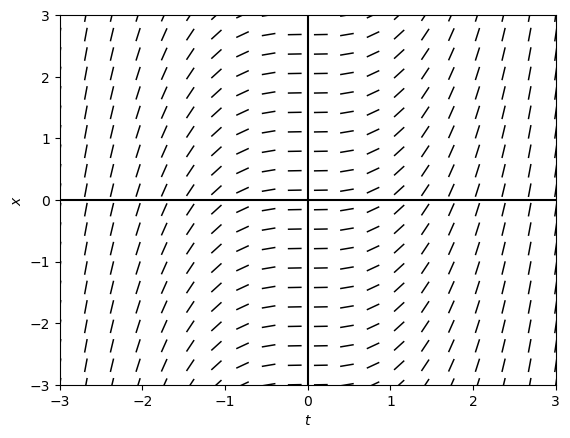

In [5]:
ax = plot_slope_field(t**2,(t,-3,3),(x,-3,3))
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
vector_fields.add_central_axis(ax)
plt.show()

## Richtungsfeld von $f(t,x)=x^2$

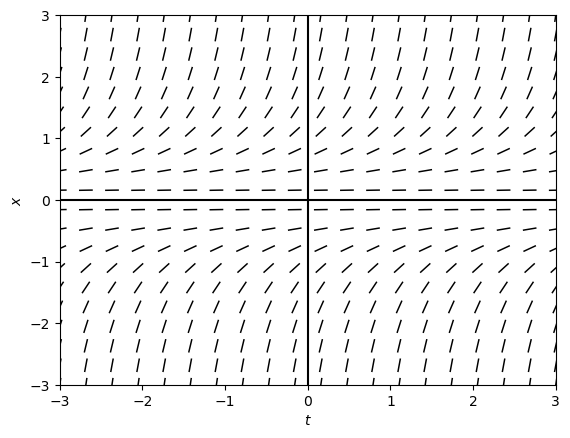

In [6]:
ax = plot_slope_field(x**2,(t,-3,3),(x,-3,3))
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
vector_fields.add_central_axis(ax)
plt.show()

## Richtungsfeld von $f(t,x)=tx$

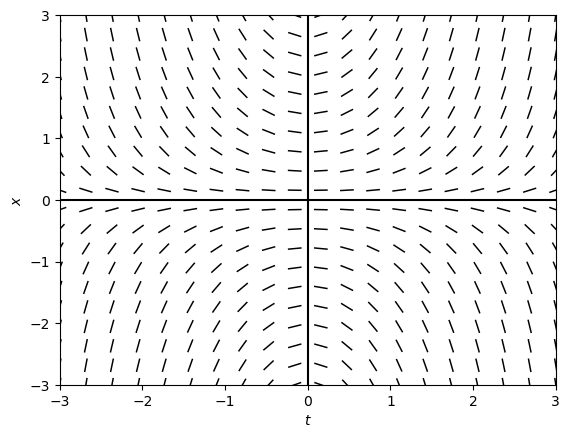

In [7]:
ax = plot_slope_field(t*x,(t,-3,3),(x,-3,3))
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
vector_fields.add_central_axis(ax)
plt.show()

# Richtungsfelder mit Lösungen

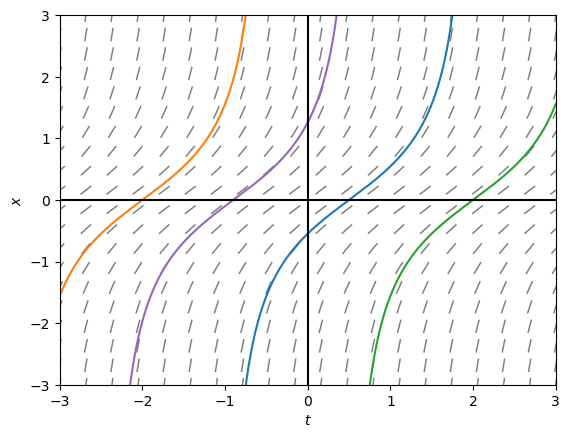

In [8]:
ax = plot_slope_field(1+x**2,(t,-3,3),(x,-3,3),color="tab:grey")
for i,color in zip((-2,-0.9,0.5,2), ("tab:orange","tab:purple","tab:blue","tab:green")):
    vector_fields.plot(tan(t-i),(t,i-np.pi/2,i+np.pi/2),(-3,3),numpoints=5000,ax=ax, color=color)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x$")
ax.set_xlim(-3,3)
vector_fields.add_central_axis(ax)
plt.show()

/mnt/Daten/Mathematik/Lehre/2023 - SS - ODE/Jupyter/examples/vector_fields.py:217: RuntimeWarning: invalid value encountered in scalar divide
  angle = np.arctan(dy / dx)
/mnt/Daten/Mathematik/Lehre/2023 - SS - ODE/Jupyter/examples/vector_fields.py:195: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin,xmax)


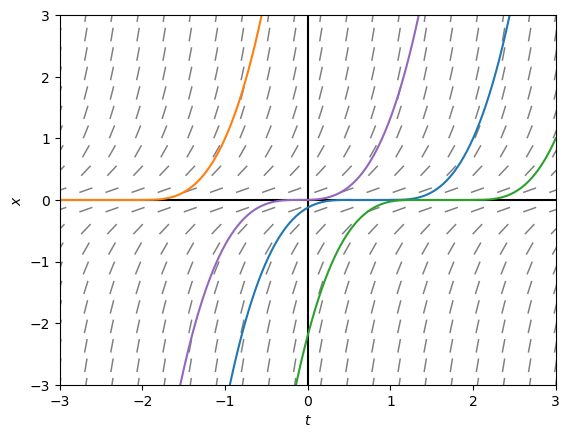

In [9]:
ax = plot_slope_field(3*sqrt(x**2,3),(t,-3,3),(x,-3,3),color="tab:grey")
vector_fields.add_central_axis(ax)
for xb, color in zip(((-3,-2),(-0.1,-0.1),(0.5,1),(1.3,2)), ("tab:orange","tab:purple","tab:blue","tab:green")):
    i,j = xb
    vector_fields.plot((t-i)**3,(t,-3,i),(-3,3),numpoints=5000,ax=ax, color=color)
    vector_fields.plot(0,(t,i,j),(-3,3),numpoints=2,ax=ax, color=color)
    vector_fields.plot((t-j)**3,(t,j,3),(-3,3),numpoints=5000,ax=ax, color=color)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x$")
ax.set_xlim(-3,3)
plt.savefig("slope-field-x23.pdf")
plt.show()

<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(2)*sqrt(log(0.833333333333333*t))


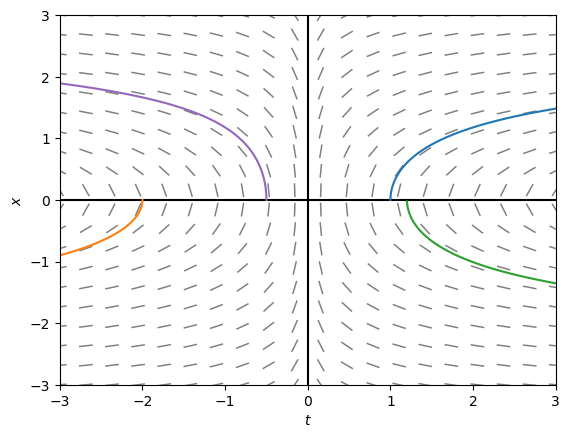

In [10]:
ax = plot_slope_field(1/(t*x),(t,-3,3),(x,-3,3),color="tab:grey")
vector_fields.add_central_axis(ax)
for xb, color in zip(((-2,-1),(-0.5,1),(1,1),(1.2,-1)), ("tab:orange","tab:purple","tab:blue","tab:green")):
    (t0,v) = xb
    if t0>0:
        vector_fields.plot(v*sqrt(2*ln(t/t0)),(t,t0,3),(-3,3),numpoints=5000,ax=ax, color=color)
    else:
         vector_fields.plot(v*sqrt(2*ln(t/t0)),(t,-3,t0),(-3,3),numpoints=5000,ax=ax, color=color)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x$")
ax.set_xlim(-3,3)
plt.show()